# Requirements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost as xgb
import datetime as dt

In [155]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [5]:
df = pd.read_csv('obesity.csv')

Explore the dataset using visualizations of your choice.

In [19]:
df.sample(10)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
1865,NaN,24.149036,1.694439,114.479459,NaN,3.000000,no,2.822871,NaN,0.870920,NaN,Obesity_Type_III
4415,Male,30.722801,1.825449,120.980508,2.967300,3.000000,no,NaN,1.271667,0.002600,NaN,Obesity_Type_II
16657,NaN,NaN,1.872517,NaN,3.000000,3.000000,no,2.902682,1.606109,0.418623,NaN,Obesity_Type_II
18394,Female,23.000000,1.650000,NaN,3.000000,3.000000,NaN,1.000000,1.000000,0.000000,NaN,Obesity_Type_I
3442,Male,18.128249,NaN,52.086570,1.642241,3.000000,no,2.000000,0.112454,1.895312,Public_Transportation,Insufficient_Weight
5998,Male,31.205668,1.751029,120.158049,2.219186,3.000000,no,2.151028,0.554646,NaN,Automobile,Obesity_Type_II
9209,Male,21.000000,NaN,75.000000,3.000000,1.000000,NaN,3.000000,1.000000,NaN,Public_Transportation,Overweight_Level_I
16801,Female,26.000000,NaN,111.856492,3.000000,3.000000,no,2.720050,0.000000,0.097760,NaN,NaN
18470,NaN,21.000000,1.620000,54.000000,3.000000,1.000000,no,NaN,1.000000,0.000000,Public_Transportation,Normal_Weight
19508,Female,39.129291,1.551288,62.211572,2.392665,2.983201,NaN,2.000000,0.000000,0.107240,Automobile,NaN


In [21]:
df.value_counts()

Gender  Age        Height    Weight      FCVC      NCP       SMOKE  CH2O      FAF       TUE       MTRANS                 NObeyesdad         
Male    18.000000  1.700000  70.000000   2.000000  3.000000  no     2.000000  1.000000  1.000000  Public_Transportation  Normal_Weight          2
Female  22.000000  1.600000  82.000000   2.000000  1.000000  no     2.000000  0.000000  2.000000  Public_Transportation  Obesity_Type_I         2
        16.000000  1.560000  64.000000   2.000000  3.000000  no     2.000000  0.000000  1.000000  Public_Transportation  Normal_Weight          1
Male    21.000000  1.700000  65.000000   2.000000  3.000000  no     2.000000  2.000000  0.000000  Public_Transportation  Normal_Weight          1
                             80.000000   2.000000  1.000000  no     2.000000  1.000000  2.000000  Public_Transportation  Overweight_Level_II    1
                                                                                                                                 

In [13]:
dfdropped = df.drop(columns=["Unnamed: 0", "id"], axis=1, inplace=False)

In [17]:
df = dfdropped.copy()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [23]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,Gender,19.867039
1,Age,19.992292
2,Height,19.708064
3,Weight,20.623374
4,FCVC,19.833317
5,NCP,19.563542
6,SMOKE,19.799595
7,CH2O,20.045284
8,FAF,19.939301
9,TUE,19.977840


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

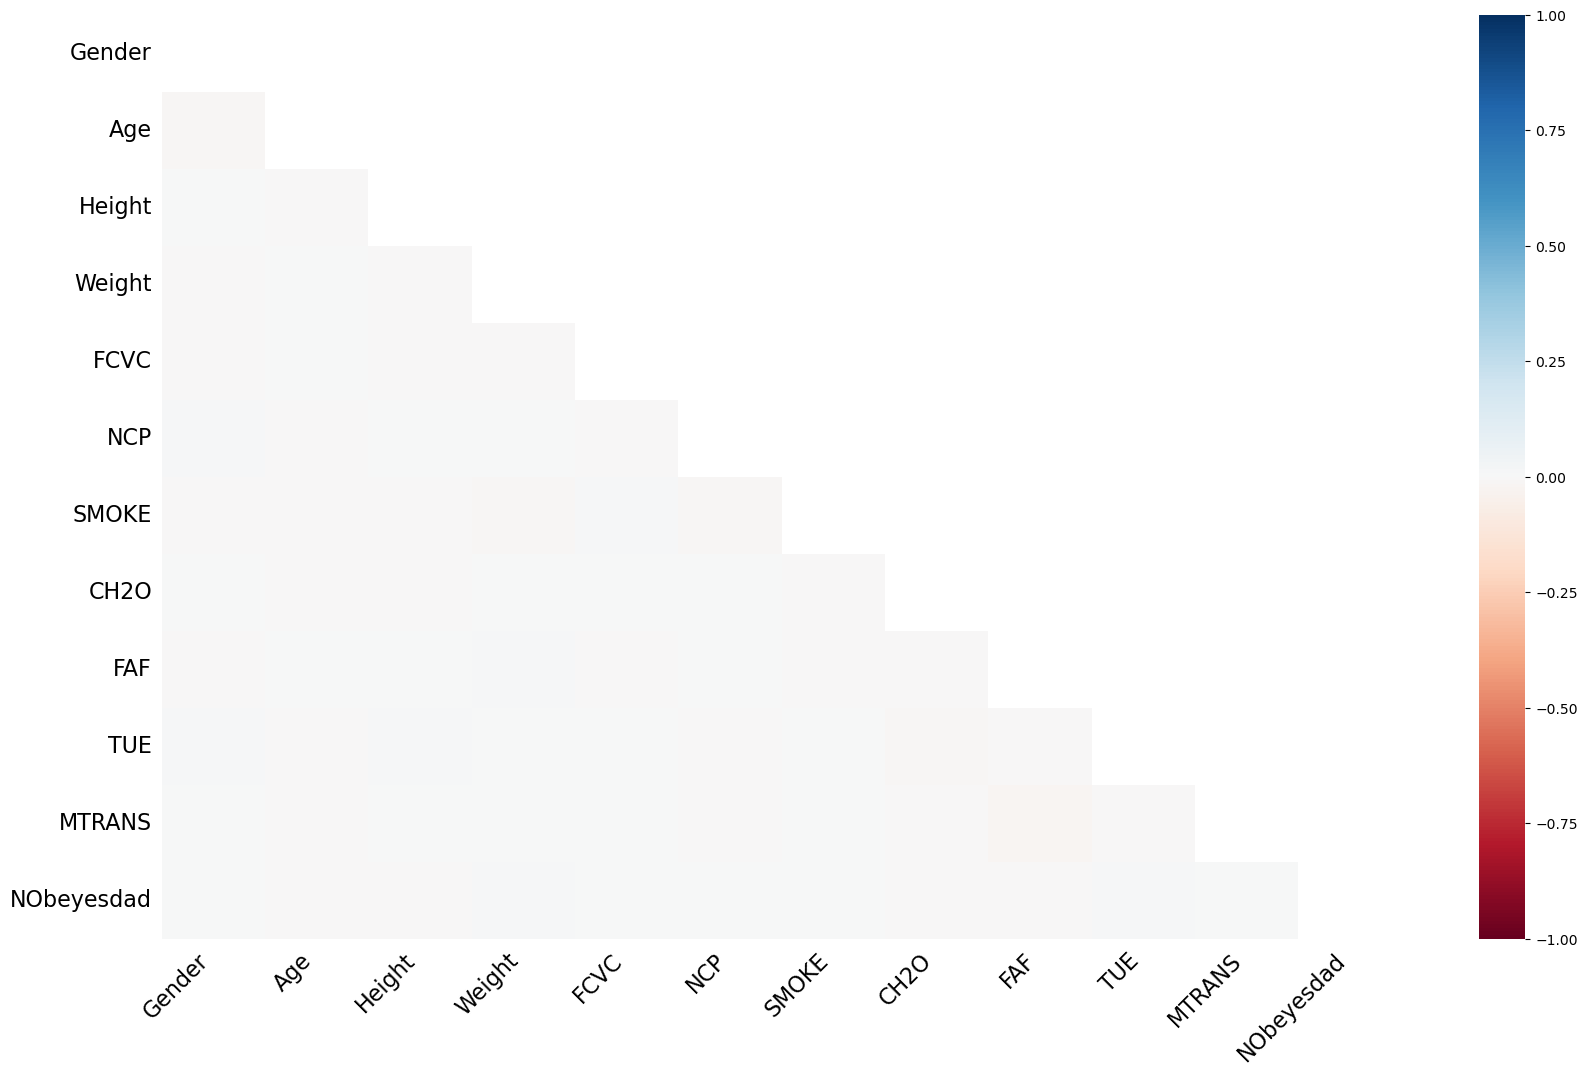

In [25]:
msno.heatmap(df)
plt.show()

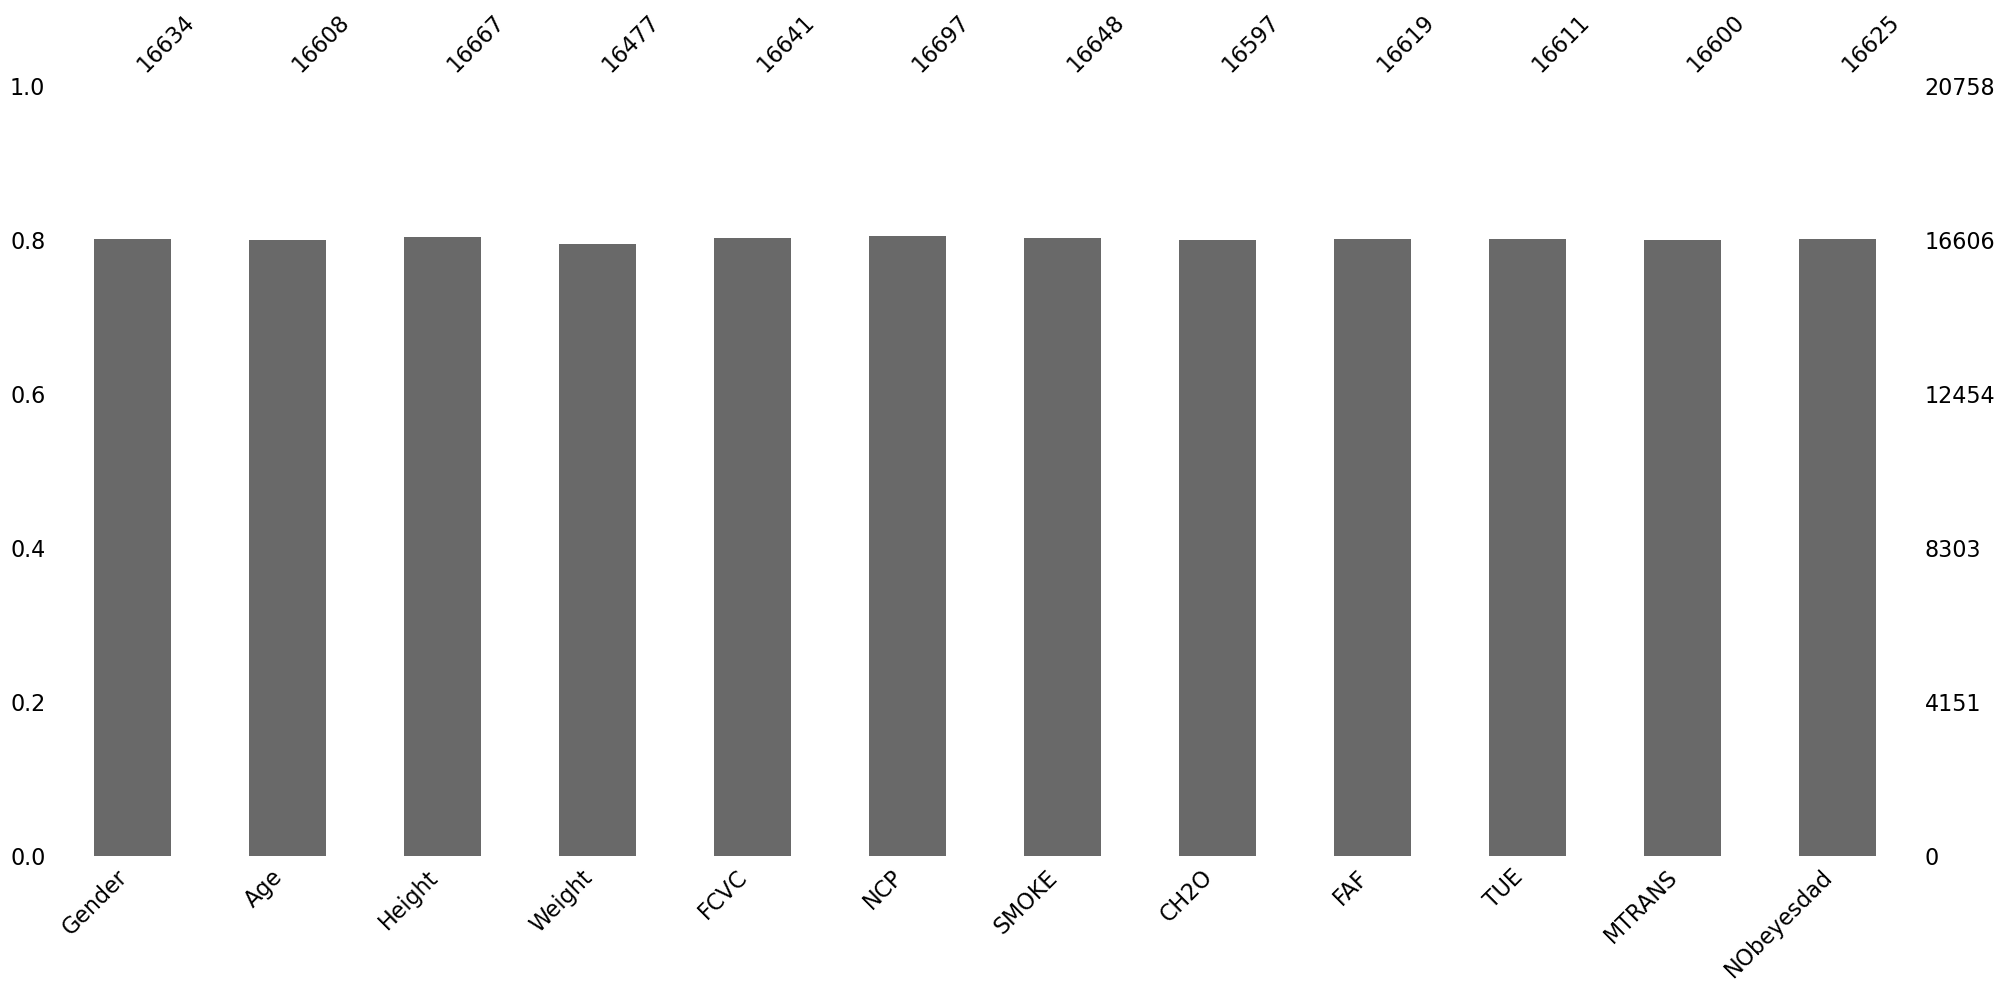

In [27]:
msno.bar(df)
plt.show()

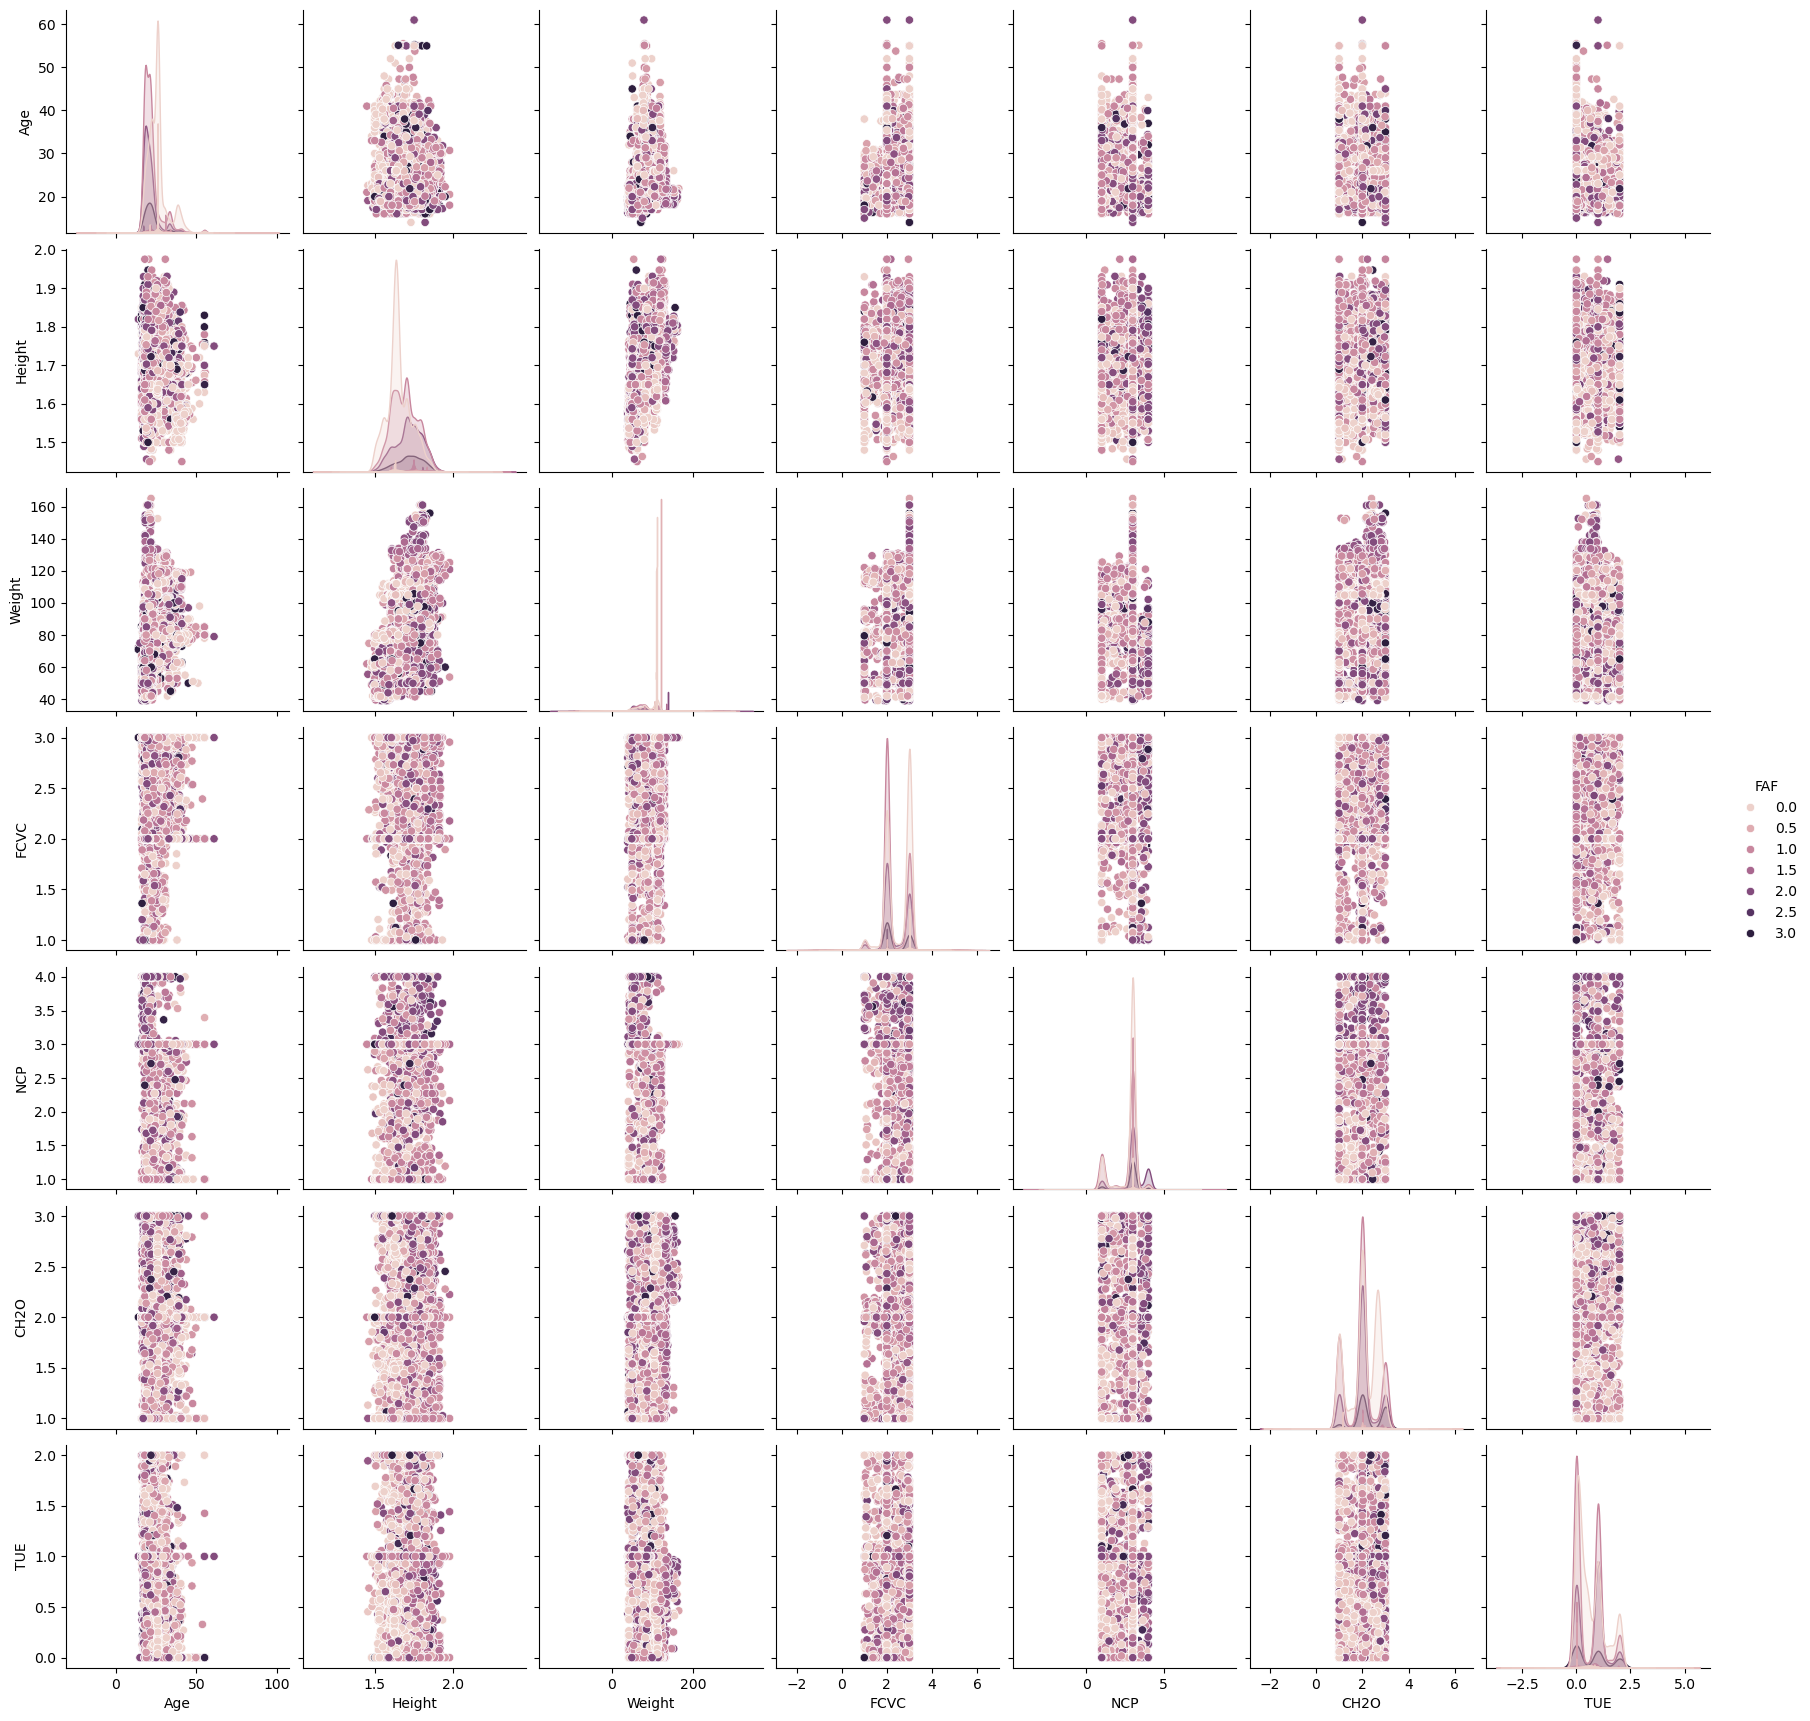

In [31]:
sns.pairplot(df, hue='FAF')

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [33]:
target_drop = df.dropna(subset='FAF', axis=0, inplace=False)

In [35]:
target_drop.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
NCP           3237
SMOKE         3293
CH2O          3338
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [37]:
df = target_drop.copy()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16619 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      13314 non-null  object 
 1   Age         13311 non-null  float64
 2   Height      13357 non-null  float64
 3   Weight      13222 non-null  float64
 4   FCVC        13304 non-null  float64
 5   NCP         13382 non-null  float64
 6   SMOKE       13326 non-null  object 
 7   CH2O        13281 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         13288 non-null  float64
 10  MTRANS      13238 non-null  object 
 11  NObeyesdad  13306 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [43]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    # if 'nan' in encoder.classes_:
    #   data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy

In [45]:
df_copy = label_data(df, columns=['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad'])

In [61]:
df_copy['Gender'].value_counts()

Gender
0.0    6670
1.0    6644
Name: count, dtype: int64

In [55]:
df_copy['Gender'] = df_copy['Gender'].replace(2, np.nan)

In [67]:
df_copy['SMOKE'].value_counts()

SMOKE
1.0    13164
2.0      162
Name: count, dtype: int64

In [65]:
df_copy['SMOKE'] = df_copy['SMOKE'].replace(0, np.nan)

In [69]:
df_copy['MTRANS'].value_counts()

MTRANS
3    10649
5     3381
0     2260
4      286
1       23
2       20
Name: count, dtype: int64

In [71]:
df_copy['MTRANS'] = df_copy['MTRANS'].replace(5, np.nan)

In [73]:
df_copy['NObeyesdad'].value_counts()

NObeyesdad
7    3313
4    2607
3    2110
1    1932
2    1869
6    1648
0    1609
5    1531
Name: count, dtype: int64

In [75]:
df_copy['NObeyesdad'] = df_copy['NObeyesdad'].replace(7, np.nan)

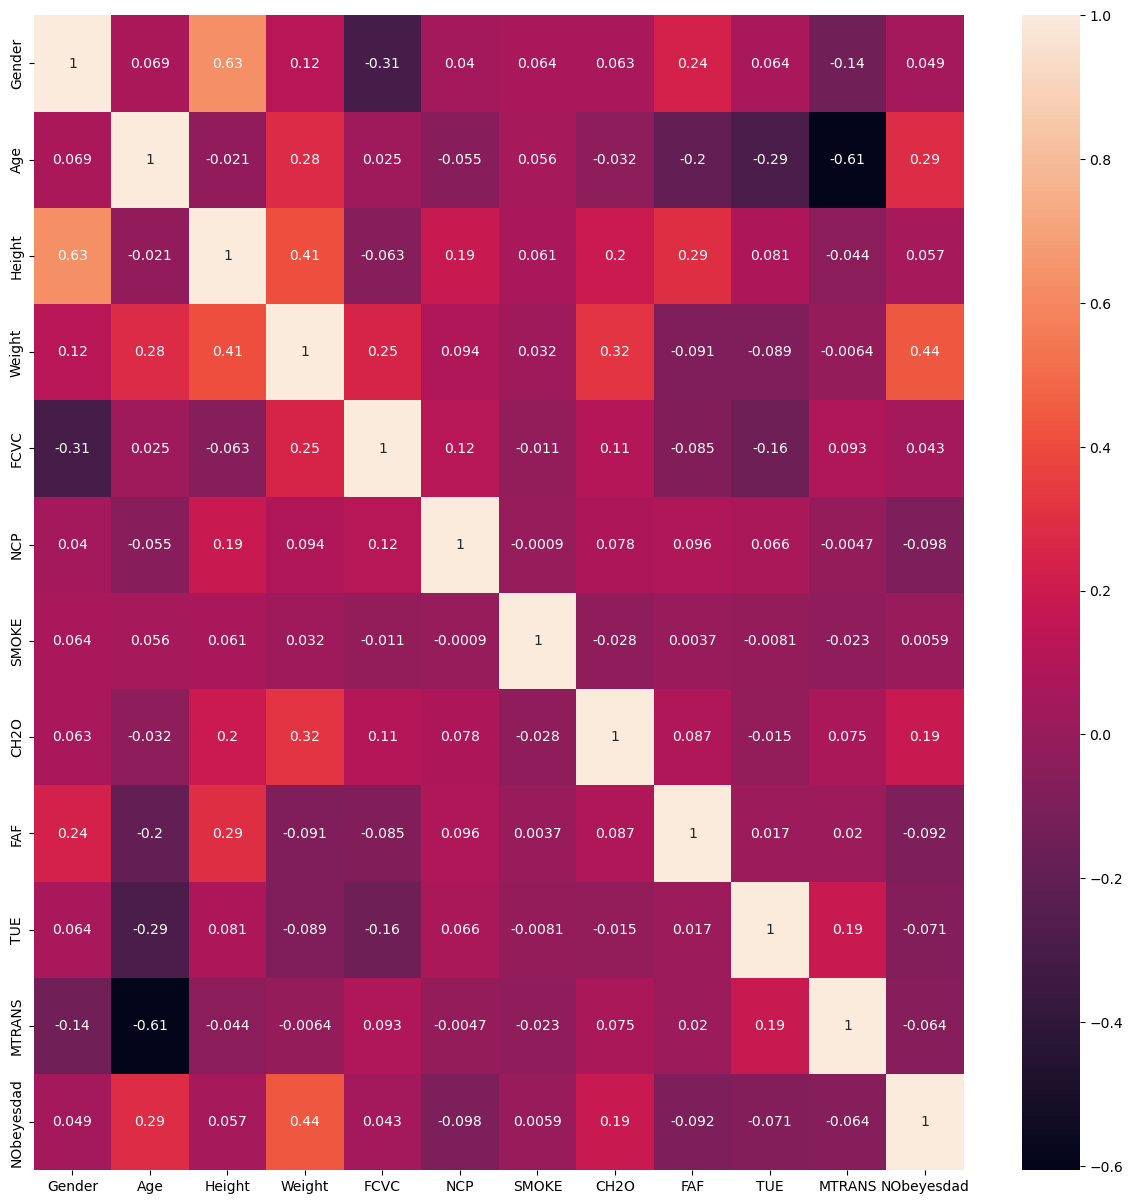

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

In [117]:
df_copy.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [81]:
df_copy.sample(10)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
7044,NaN,18.000000,1.691322,51.084570,2.842102,4.000000,1.0,2.000000,2.000000,NaN,3.0,0.0
6073,1.0,24.417552,1.774983,120.898397,2.499388,3.000000,NaN,2.109697,0.863158,0.462973,3.0,3.0
8292,NaN,NaN,1.753716,86.319887,2.000000,2.677693,NaN,NaN,1.308852,0.534553,3.0,NaN
14643,1.0,25.526746,NaN,115.347176,2.969233,3.000000,1.0,2.640483,1.325340,0.000000,NaN,NaN
17770,0.0,20.000000,1.752265,54.877111,NaN,3.098399,1.0,2.004126,1.838881,2.000000,3.0,0.0
9061,0.0,18.178023,NaN,41.397378,2.966126,1.000000,1.0,1.919629,0.000000,1.339691,NaN,NaN
19550,0.0,25.930376,1.603404,104.854928,NaN,3.000000,1.0,NaN,0.246290,0.516764,3.0,NaN
3079,1.0,38.112989,1.750000,118.332689,2.919584,NaN,1.0,2.024035,0.822186,0.000000,0.0,3.0
13694,0.0,25.920738,1.722396,104.790549,3.000000,3.000000,1.0,1.773236,0.045246,NaN,3.0,4.0
171,0.0,21.000000,1.700000,NaN,3.000000,NaN,1.0,2.000000,2.000000,0.000000,3.0,1.0


In [83]:
def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int, weights:str):
  imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
  return data_copy

In [93]:
knn_imputer = KNNImputer()
imputer_simple_median=SimpleImputer(strategy='median')
mice_imputer = IterativeImputer()

In [99]:
df_copy = df.copy()

In [103]:
df_copy['Gender'] = mice_imputer.fit_transform(df_copy[['Height']])
df_copy['Height'] = mice_imputer.fit_transform(df_copy[['Gender']])

In [107]:
df_copy['Age'] = mice_imputer.fit_transform(df_copy[['MTRANS']])
df_copy['MTRANS'] = mice_imputer.fit_transform(df_copy[['Age']])

In [111]:
df_copy['Weight'] = knn_imputer.fit_transform(df_copy[['Weight']])
df_copy['FCVC'] = knn_imputer.fit_transform(df_copy[['FCVC']])
df_copy['NCP'] = knn_imputer.fit_transform(df_copy[['NCP']])
df_copy['CH2O'] = knn_imputer.fit_transform(df_copy[['CH2O']])
df_copy['TUE'] = knn_imputer.fit_transform(df_copy[['TUE']])

<Axes: >

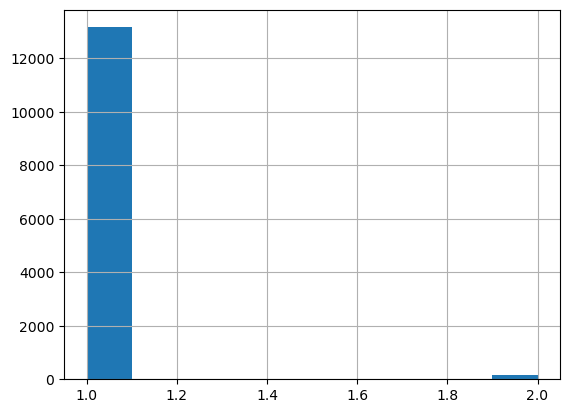

In [113]:
df_copy['SMOKE'].hist()

In [115]:
df_copy['SMOKE'] = imputer_simple_median.fit_transform(df_copy[['SMOKE']])
df_copy['MTRANS'] = imputer_simple_median.fit_transform(df_copy[['MTRANS']])
df_copy['NObeyesdad'] = imputer_simple_median.fit_transform(df_copy[['NObeyesdad']])

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [119]:
X, Y = df_copy.drop(columns=['FAF']), df_copy['FAF']
X_Train, X_test, Y_Train, Y_test = train_test_split(X,Y,test_size=0.2)

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [171]:
model = xgb.XGBRegressor()

In [133]:
model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
Y_pred = model.predict(X_test)

In [153]:
print(mean_squared_error(Y_pred, Y_test))

0.5128096193496389


In [159]:
print(r2_score(Y_pred, Y_test))

-0.7110748070662221


In [163]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [165]:
from sklearn.model_selection import GridSearchCV

In [169]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_Train, Y_Train)

# Output the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.9}
Best Score: 0.3174698051891434


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [175]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_Train, Y_Train, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.27500281 0.28443897 0.24131313 0.25778575 0.26153985]
Mean CV Score: 0.2640


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.